In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sourcing import Covid

In [2]:
tests = pd.DataFrame(Covid().get_tests(per_population=True).tests)
tests['new'] = tests.groupby(level=0).diff()

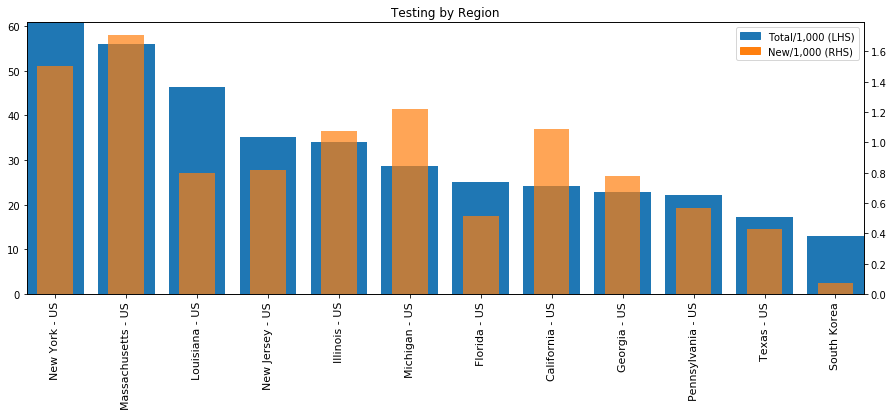

In [3]:
latest = tests.xs(tests.index.get_level_values(level=1).sort_values()[-2], level=1, drop_level=False
                 ).reset_index(level=1, drop=True).sort_values('tests', ascending=False)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(latest.index, latest['tests'], color='tab:blue')
ax.set_xticklabels(latest.index, rotation=90, fontsize=11)
ax2 = ax.twinx().bar(latest.index, latest['new'], color='tab:orange', alpha = 0.7, width=0.5)
ax.margins(0)
plt.title('Testing by Region')
leg=ax.legend(handles=[Patch(label='Total/1,000 (LHS)', color='tab:blue')
                       , Patch(label='New/1,000 (RHS)', color='tab:orange')]
              , loc='upper right'
             )

In [4]:
cases_to_tests_ratio = Covid().cases_to_tests()
cases_to_tests_ratio.tail()

region         date      
United States  2020-05-05    0.159637
               2020-05-06    0.157874
               2020-05-07    0.155082
               2020-05-08    0.152689
               2020-05-09    0.150357
Name: cases_to_tests_ratio, dtype: float64

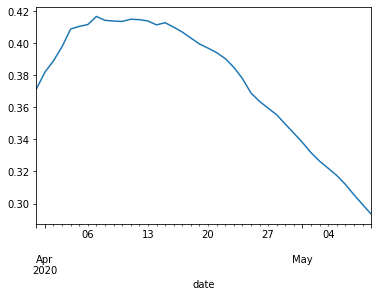

In [6]:
_ = cases_to_tests_ratio.loc['New York - US'].loc['2020-03-31':].plot()